In [1]:
# Import packages


from scipy.interpolate import interp1d
import time
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
get_ipython().run_line_magic('matplotlib', 'inline')
import datetime
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import matplotlib.ticker as plticker
import bisect
import copy
import json
import csv
import ast
import pylab as pl
import time
from scipy.special import erf
from scipy import integrate
from scipy.integrate import quad, dblquad
from scipy.integrate import simps

c0 = (0.76, 0.76, 0.76)
c1 = (1.00, 0.18, 0.33);
c2 = (1.00, 0.23, 0.19);
c3 = (1.00, 0.58, 0.00);
c4 = (1.00, 0.80, 0.00);
c5 = (0.30, 0.85, 0.39);
c6 = (0.35, 0.78, 0.98);
c7 = (0.20, 0.67, 0.86);
c8 = (0.00, 0.48, 1.00);
c9 = (0.35, 0.34, 0.84);
c10 = (0.00, 0.31, 0.57);
c11 = (0.12, 0.29, 0.69);
c12 = (0.17, 0.17, 0.42);
c13 = (1.00, 1.00, 1.00);
c14 = (0.77, 0.04, 0.00);

ios_colors=[c5, c1, c3, c7, c2, c6, c4, c9, c8]

def to_rgb_frac(vect):
    return (float(vect[0])/255, float(vect[1])/255, float(vect[2])/255)

color_list=list(map(to_rgb_frac, [(166,206,227),(178,223,138),(51,160,44),(31,120,180)]))

# Lists of colors for plots

def to_rgb_frac(vect):
    return (float(vect[0])/255, float(vect[1])/255, float(vect[2])/255)

rb_div_5=list(map(to_rgb_frac, [(202,0,32),
(244,165,130),
(247,247,247),
(146,197,222),
(5,113,176)]))

qualitative_10=list(map(to_rgb_frac, [(166,206,227),
(31,120,180),
(178,223,138),
(51,160,44),
(251,154,153),
(227,26,28),
(253,191,111),
(255,127,0),
(202,178,214),
(106,61,154)]))


In [2]:
#define the colors from colorbrewer2
orange1 = '#feedde'
orange2 = '#fdbe85'
orange3 = '#fd8d3c'
orange4 = '#e6550d'
orange5 = '#a63603'
blue1 = '#eff3ff'
blue2 = '#bdd7e7'
blue3 = '#6baed6'
blue4 = '#3182bd'
blue5 = '#08519c'
green1 = '#edf8e9'
green2 = '#bae4b3'
green3 = '#74c476'
green4 = '#31a354'
green5 = '#006d2c'
grey1 = '#f7f7f7'
grey2 = '#cccccc'
grey3 = '#969696'
grey4 = '#636363'
grey5 = '#252525'
purple1 = '#f2f0f7'
purple2 = '#cbc9e2'
purple3 = '#9e9ac8'
purple4 = '#756bb1'
purple5 = '#54278f'
red1 = '#fee5d9'
red2 = '#fcae91'
red3 = '#fb6a4a'
red4 = '#de2d26'
red5 = '#a50f15'

# Import data

In [4]:
import csv
filename="CH_Silent_calls.csv"

Patient_dictionary = {}
Untreated_patients_dictionary = {}
with open(filename, 'r') as csvfile:
    read_reader = csv.DictReader(csvfile)  #csv.reader returns a reader object which will iterate over lines in the csvfile
    row_count=0

    for row in read_reader:
        patient_id = row['DMP_PATIENT_ID']
        gene_name = row['Gene']
        treatment_status = str(row['therapy_binary'])
        mutation_type = row['VariantClass']

        if treatment_status == 'untreated' and patient_id not in Untreated_patients_dictionary.keys():
            Untreated_patients_dictionary[patient_id]=0

print('Number of unique untreated patients', len(Untreated_patients_dictionary.keys()))

import csv
filename="All_CH_mutations_for_jamie.csv"

common_variants = ['DNMT3A','TET2','ASXL1','JAK2','TP53','SF3B1','KRAS','CBL','SRSF2','IDH2']

list_synonymous_VAF = []
list_nonsynonymous_VAF = []
Untreated_patients_synonymous_VAF_dictionary = {}
Untreated_patients_nonsynonymous_VAF_dictionary = {}
Untreated_patients_common_nonsynonymous_VAF_dictionary = {}
interesting_patient_ID=['P-0014172', 'P-0017061', 'P-0024590']
with open(filename, 'r') as csvfile:
    read_reader = csv.DictReader(csvfile)  #csv.reader returns a reader object which will iterate over lines in the csvfile
    row_count=0

    for row in read_reader:
        patient_id = row['DMP_PATIENT_ID']
        gene_name = row['Gene']
        panel_version = row['Version']
        mutation_type = row['VariantClass']
        VAF = float(row['N_AltFreq'])
        
        if patient_id in Untreated_patients_dictionary.keys():
            if mutation_type =='Missense_Mutation' or mutation_type =='Nonsense_Mutation':                
                list_nonsynonymous_VAF.append(VAF)
                
                if patient_id not in Untreated_patients_nonsynonymous_VAF_dictionary.keys():
                    Untreated_patients_nonsynonymous_VAF_dictionary[patient_id]=[VAF]
                else:
                    tmp = Untreated_patients_nonsynonymous_VAF_dictionary[patient_id]
                    tmp.append(VAF)
                    Untreated_patients_nonsynonymous_VAF_dictionary[patient_id]=tmp
                    
                if gene_name in common_variants:
                    if patient_id not in Untreated_patients_common_nonsynonymous_VAF_dictionary.keys():
                        Untreated_patients_common_nonsynonymous_VAF_dictionary[patient_id]=[VAF]
                    else:
                        tmp = Untreated_patients_common_nonsynonymous_VAF_dictionary[patient_id]
                        tmp.append(VAF)
                        Untreated_patients_common_nonsynonymous_VAF_dictionary[patient_id]=tmp
                        
                if patient_id in interesting_patient_ID:
                    print('diagonal data point nonsyn gene', gene_name, 'vaf', VAF, 'paitnet_ID', patient_id)

        if patient_id in Untreated_patients_dictionary.keys():
            if mutation_type == 'Silent':
                list_synonymous_VAF.append(VAF)
                
                if patient_id not in Untreated_patients_synonymous_VAF_dictionary.keys():
                    Untreated_patients_synonymous_VAF_dictionary[patient_id]=[VAF]
                else:
                    tmp = Untreated_patients_synonymous_VAF_dictionary[patient_id]
                    tmp.append(VAF)
                    Untreated_patients_synonymous_VAF_dictionary[patient_id]=tmp
                
                
                    
print(len(Untreated_patients_common_nonsynonymous_VAF_dictionary), 'untreated patients harbour common nonsynonymous variants')
print(len(Untreated_patients_nonsynonymous_VAF_dictionary), 'untreated patients harbour nonsynonymous variants')
print(len(Untreated_patients_synonymous_VAF_dictionary), 'untreated patients harbour synonymous variants')

Number of unique untreated patients 590
diagonal data point nonsyn gene U2AF1 vaf 0.26146 paitnet_ID P-0014172
diagonal data point nonsyn gene RAD21 vaf 0.02629 paitnet_ID P-0014172
diagonal data point nonsyn gene DNMT3A vaf 0.29363 paitnet_ID P-0017061
diagonal data point nonsyn gene TET2 vaf 0.25495 paitnet_ID P-0017061
diagonal data point nonsyn gene SRC vaf 0.22647 paitnet_ID P-0024590
118 untreated patients harbour common nonsynonymous variants
238 untreated patients harbour nonsynonymous variants
200 untreated patients harbour synonymous variants


In [5]:
Untreated_patients_largest_synonymous_VAF_dictionary = {}
Untreated_patients_largest_nonsynonymous_VAF_dictionary = {}
Untreated_patients_largest_common_nonsynonymous_VAF_dictionary = {}
for patient_id in Untreated_patients_synonymous_VAF_dictionary.keys():
    tmp = Untreated_patients_synonymous_VAF_dictionary[patient_id]
    max_VAF = max(tmp)
    Untreated_patients_largest_synonymous_VAF_dictionary[patient_id] = max_VAF
    
for patient_id in Untreated_patients_nonsynonymous_VAF_dictionary.keys():
    tmp = Untreated_patients_nonsynonymous_VAF_dictionary[patient_id]
    max_VAF = max(tmp)
    Untreated_patients_largest_nonsynonymous_VAF_dictionary[patient_id] = max_VAF
    
for patient_id in Untreated_patients_common_nonsynonymous_VAF_dictionary.keys():
    tmp = Untreated_patients_common_nonsynonymous_VAF_dictionary[patient_id]
    max_VAF = max(tmp)
    Untreated_patients_largest_common_nonsynonymous_VAF_dictionary[patient_id] = max_VAF
    

list_syn_VAF_in_order = []
list_nonsyn_VAF_in_order = []
list_syn_VAF_with_common_nonsyn_in_order = []
list_common_nonsyn_VAF_in_order = []

            
for patient_id in Untreated_patients_largest_synonymous_VAF_dictionary.keys():
#     if patient_id in Untreated_patients_largest_synonymous_VAF_dictionary.keys():
    list_syn_VAF_in_order.append(Untreated_patients_largest_synonymous_VAF_dictionary[patient_id])
    
#     else:
#         list_syn_VAF_in_order.append(0)
        
    if patient_id in Untreated_patients_largest_nonsynonymous_VAF_dictionary.keys():
        list_nonsyn_VAF_in_order.append(Untreated_patients_largest_nonsynonymous_VAF_dictionary[patient_id])
        if abs(Untreated_patients_largest_nonsynonymous_VAF_dictionary[patient_id]-Untreated_patients_largest_synonymous_VAF_dictionary[patient_id])<0.015\
        and Untreated_patients_largest_nonsynonymous_VAF_dictionary[patient_id]>0.2:
            print(patient_id,'has very close nonsyn and syn VAF. syn VAF')
    else:
        list_nonsyn_VAF_in_order.append(0)
        


for patient_id in Untreated_patients_largest_synonymous_VAF_dictionary.keys():
#     if patient_id in Untreated_patients_largest_synonymous_VAF_dictionary.keys():
    list_syn_VAF_with_common_nonsyn_in_order.append(Untreated_patients_largest_synonymous_VAF_dictionary[patient_id])
#     else:
#         list_syn_VAF_with_common_nonsyn_in_order.append(0)
        
    if patient_id in Untreated_patients_largest_common_nonsynonymous_VAF_dictionary.keys():
        list_common_nonsyn_VAF_in_order.append(Untreated_patients_largest_common_nonsynonymous_VAF_dictionary[patient_id])
    else:
        list_common_nonsyn_VAF_in_order.append(0)

 

P-0014172 has very close nonsyn and syn VAF. syn VAF
P-0017061 has very close nonsyn and syn VAF. syn VAF
P-0024590 has very close nonsyn and syn VAF. syn VAF


ratio in the upper diagonal including syn variants in all genes 0.27 n_syn_less_than_nonsyn 54 total 200


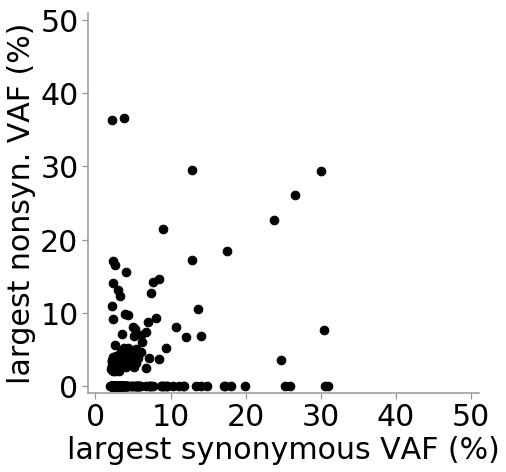

In [6]:
# Plot graph
import matplotlib.pyplot as plt
plt.close()

f, ax = plt.subplots(figsize=(7,7)) # set the size that you'd like (width, height)

# n_untreated_patients_with_syn_var = 200

from scipy.stats import pearsonr
corr_control, p_value_control= pearsonr(list_syn_VAF_in_order, list_nonsyn_VAF_in_order)
# print('correlation between largest syn vaf and largest nonsyn clone VAF in NOTCH1 or TP53 genes is ', \
#       corr_control,'and p value is', p_value_control)    

n_syn_less_than_nonsyn = 0
n_syn_more_than_nonsyn = 0
for m in range(len(list_syn_VAF_in_order)):
    if list_syn_VAF_in_order[m] < list_nonsyn_VAF_in_order[m]:
        n_syn_less_than_nonsyn = n_syn_less_than_nonsyn + 1
    else:
        n_syn_more_than_nonsyn = n_syn_more_than_nonsyn + 1
    
print('ratio in the upper diagonal including syn variants in all genes', n_syn_less_than_nonsyn / (n_syn_less_than_nonsyn + n_syn_more_than_nonsyn),\
     'n_syn_less_than_nonsyn', n_syn_less_than_nonsyn, 'total',n_syn_less_than_nonsyn + n_syn_more_than_nonsyn)

ax.scatter(list_syn_VAF_in_order, list_nonsyn_VAF_in_order, marker='o',  color='black', s=75, zorder=1)
# x_vector=np.linspace(trimmed_fmin, trimmed_fmax, 100)
# y_vector=x_vector
# ax.plot(x_vector, y_vector, zorder=0, color='black')


ax.set_xlabel('largest synonymous VAF (%)', fontsize=30)
ax.set_ylabel('largest nonsyn. VAF (%)', fontsize=30)
ax.set_xlim(-0.01, 0.5+0.01)
ax.set_ylim(-0.01, 0.5+0.01)

x_major_ticks =  [0, 0.1, 0.2, 0.3, 0.4, 0.5]
x_major_tick_labels =  [ "0","10", '20', '30', '40', '50']              
ax.set_xticks(x_major_ticks)
ax.set_xticklabels(x_major_tick_labels, fontsize = 30)
ax.xaxis.set_tick_params(width=1.2, color = grey3, length = 6)

y_major_ticks =  [0, 0.1, 0.2, 0.3, 0.4, 0.5]
y_major_tick_labels =  ["0","10", '20', '30', '40', '50']              
ax.set_yticks(y_major_ticks)
ax.set_yticklabels(y_major_tick_labels, fontsize = 30)
ax.yaxis.set_tick_params(width=1.2, color = grey3, length = 6)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(1.5)

for axis in ['bottom','left']:
    ax.spines[axis].set_color(grey3)

# plt.savefig('Bolton_largest_nonsyn_versus_syn.pdf', bbox_inches='tight')

ratio in the upper diagonal including syn variants in all genes 0.12 n_syn_less_than_nonsyn 24 total 200


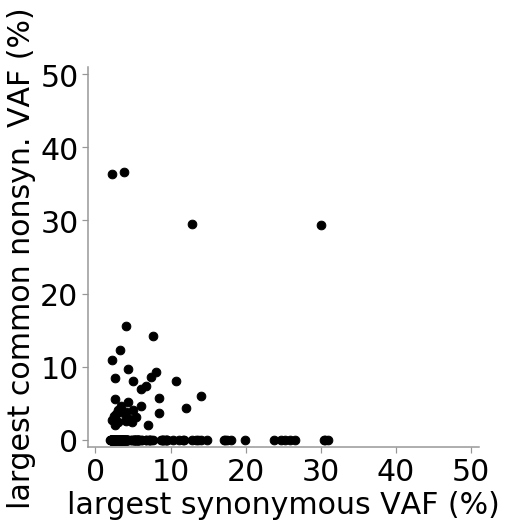

In [7]:
# Plot graph
import matplotlib.pyplot as plt
plt.close()

f, ax = plt.subplots(figsize=(7,7)) # set the size that you'd like (width, height)


from scipy.stats import pearsonr
corr_control, p_value_control= pearsonr(list_syn_VAF_with_common_nonsyn_in_order, list_common_nonsyn_VAF_in_order)
# print('correlation between largest syn vaf and largest nonsyn clone VAF in NOTCH1 or TP53 genes is ', \
#       corr_control,'and p value is', p_value_control)    

n_syn_less_than_nonsyn = 0
n_syn_more_than_nonsyn = 0
for m in range(len(list_syn_VAF_with_common_nonsyn_in_order)):
    if list_syn_VAF_with_common_nonsyn_in_order[m] < list_common_nonsyn_VAF_in_order[m]:
        n_syn_less_than_nonsyn = n_syn_less_than_nonsyn + 1
    else:
        n_syn_more_than_nonsyn = n_syn_more_than_nonsyn + 1
    
print('ratio in the upper diagonal including syn variants in all genes', n_syn_less_than_nonsyn / (n_syn_less_than_nonsyn + n_syn_more_than_nonsyn),\
     'n_syn_less_than_nonsyn', n_syn_less_than_nonsyn, 'total',n_syn_less_than_nonsyn + n_syn_more_than_nonsyn)

ax.scatter(list_syn_VAF_with_common_nonsyn_in_order, list_common_nonsyn_VAF_in_order, marker='o',  color='black', s=75, zorder=1)
# x_vector=np.linspace(trimmed_fmin, trimmed_fmax, 100)
# y_vector=x_vector
# ax.plot(x_vector, y_vector, zorder=0, color='black')



ax.set_xlabel('largest synonymous VAF (%)', fontsize=30)
ax.set_ylabel('largest common nonsyn. VAF (%)', fontsize=30)
ax.set_xlim(-0.01, 0.5+0.01)
ax.set_ylim(-0.01, 0.5+0.01)

x_major_ticks =  [0, 0.1, 0.2, 0.3, 0.4, 0.5]
x_major_tick_labels =  [ "0","10", '20', '30', '40', '50']              
ax.set_xticks(x_major_ticks)
ax.set_xticklabels(x_major_tick_labels, fontsize = 30)
ax.xaxis.set_tick_params(width=1.2, color = grey3, length = 6)

y_major_ticks =  [0, 0.1, 0.2, 0.3, 0.4, 0.5]
y_major_tick_labels =  ["0","10", '20', '30', '40', '50']              
ax.set_yticks(y_major_ticks)
ax.set_yticklabels(y_major_tick_labels, fontsize = 30)
ax.yaxis.set_tick_params(width=1.2, color = grey3, length = 6)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(1.5)

for axis in ['bottom','left']:
    ax.spines[axis].set_color(grey3)

# plt.savefig('Bolton_largest_common_nonsyn_versus_syn.pdf', bbox_inches='tight')